<a href="https://colab.research.google.com/github/mrozgurer/Bank-Churn-Prediction/blob/main/7_BankChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Definitions and Research Questions#


**Background Information**: I am a data scientist working for a bank. The bank aims to understand why some of their customers exited within the last 6 months and find out how to accurately predict if a customer will exit within the next 6 months.

**Problem Definition:** Some customers exited the bank within the last 6 months, so we must build a model that will accurately predict if a customer will exit within the next 6 months and what factors mights impact their decision.

**Research Questions:** 

What are the factors that might impact a customer's decision on exiting the bank?

What are the shared characteristics and attributes of the customers who exited the bank?

What is the best neural network model that would help the bank improve its services?

What are some business strategies that the bank may use in order to reduce and minimize exiting behavior of customers?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to split data, encode variables, and standardize the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# importing different functions to build models
import tensorflow
import keras
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Churn.csv')

In [ ]:
bank=df.copy()

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 10000 entries, and non-null count of each variable is 10000 as well, meaning that none of the variables has missing value. 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
print(f'There are {bank.shape[0]} rows and {bank.shape[1]} columns in the dataset')

There are 10000 rows and 14 columns in the dataset


The dataset is large enough to be split to train, validation, and test sets.

In [ ]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# I will drop RowNumber, Surname, and CustomerId, because they are not meaningful variables for the purposes of statistical analysis

bank.drop('RowNumber', axis=1, inplace=True)
bank.drop('CustomerId', axis=1, inplace=True)
bank.drop('Surname', axis=1, inplace=True)

In [ ]:
# I want to label the variables HasCrCard and IsActiveMember as categorical, because although they include numbers, those numbers refer to a category

bank[['HasCrCard','IsActiveMember']]=bank[['HasCrCard','IsActiveMember']].astype('category')

# Also, I want to label the variables Geography and Gender as categorical, not object, for the purposes of consistency in analysis.

bank[['Geography','Gender']]=bank[['Geography','Gender']].astype('category')

In [ ]:
# Next, I want to replace the numbers in HasCrCard and IsActiveMember with corresponding strings, so it will be easier to understand which category is which when I encode them

bank["HasCrCard"].replace(1, 'Yes' , inplace=True)

bank["HasCrCard"].replace(0, 'No', inplace=True)

In [ ]:
bank["IsActiveMember"].replace(1, 'Yes' , inplace=True)

bank["IsActiveMember"].replace(0, 'No', inplace=True)

In [ ]:
bank.duplicated().sum()

0

In [ ]:
# The code below will check the number of unique values in each variable

bank.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [ ]:
bank['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
bank['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#Exploratory Data Analysis#

In [ ]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


##Univariate Analyses##

In [ ]:
# I am creating a function that will plot the histogram and the boxplot on the same scale, so it will be easier to analyze the variables one by one.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    data: dataframe which is tour in our case
    feature: dataframe column for numerical variables
    figsize: size of figure
    kde: it shows the density curve
    bins: number of bins for histogram
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="pink")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 586.6 KB


###Credit Score###

```
# This is formatted as code
```



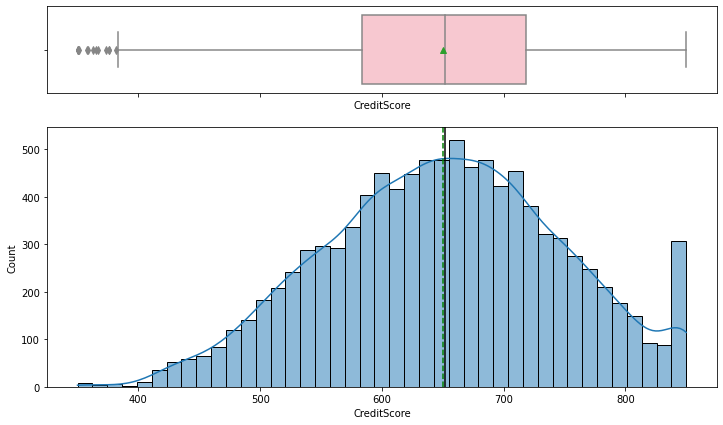

In [ ]:
histogram_boxplot(bank, 'CreditScore')

In [ ]:
bank['CreditScore'].skew()

-0.07160660820092675

Both the histogram and boxplot show that distribution is pretty normal. There are a few outliers at the right end, but those are realistic (e.g., a credit score of 350 is realistic) and do not distort the shape.

###Age###

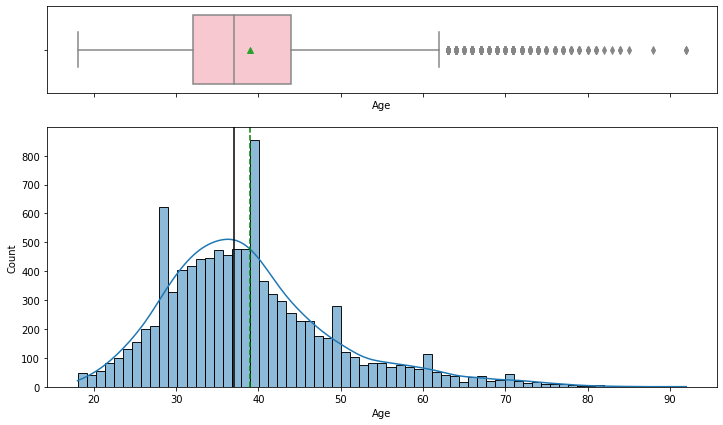

In [ ]:
histogram_boxplot(bank, 'Age')

In [ ]:
bank['Age'].skew()

1.0113202630234552

It is highly positively skewed, and there are a lot of outliers at the right end. I do not want to drop those data points, because they are meaningful scores, not unrealistic (max age is 92, which is pretty realistic). Therefore, I will use the log transformation.

In [ ]:
bank['Age_log']=np.log(bank['Age'])
bank['Age_log'].skew()

0.182020112559587

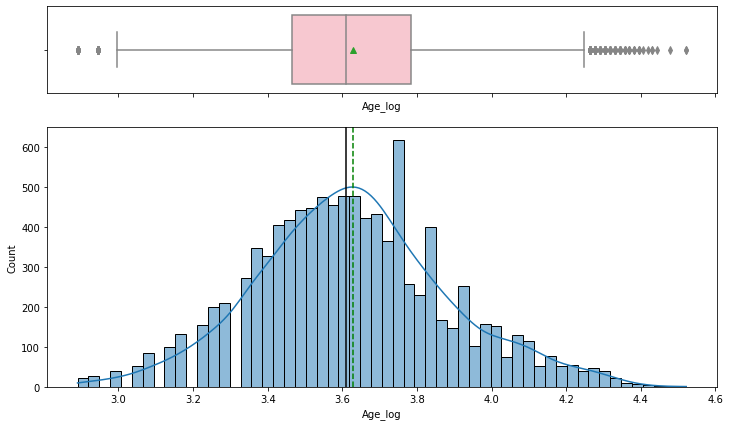

In [ ]:
histogram_boxplot(bank, 'Age_log')

The log transformation drastically reduced the skewness, and the distribution has become more normal. The skewness was reduced from 1.011 (highly skewed) to 0.18 (very slightly skewed). Therefore, I will keep the log transformed feature and remove the original one from the dataset.

In [ ]:
bank.drop(['Age'], axis=1, inplace=True)

###Tenure###

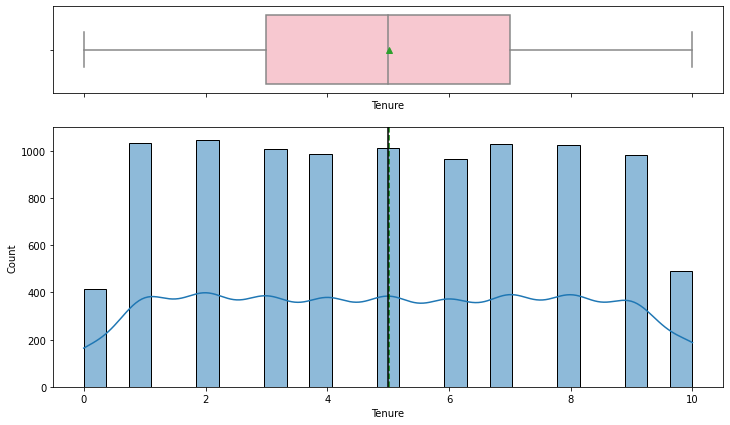

In [ ]:
histogram_boxplot(bank, 'Tenure')

In [ ]:
bank['Tenure'].skew()

0.01099145797717904

It is very close to normal distribution, so there is no need for transformation or any other kind of outlier treatment.

###Balance###

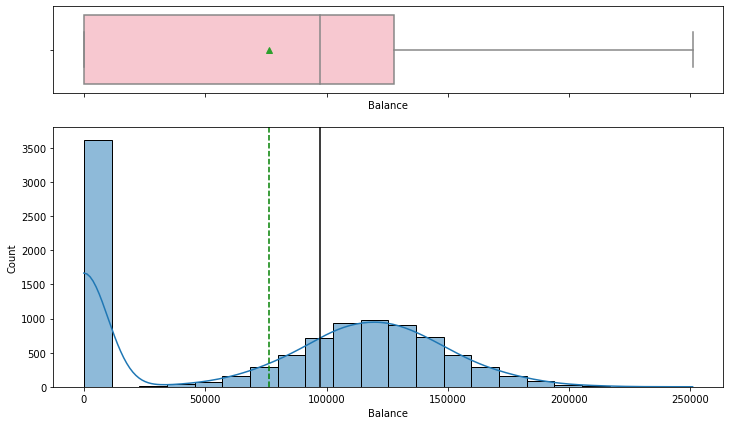

In [ ]:
histogram_boxplot(bank, 'Balance')

In [ ]:
bank['Balance'].skew()

-0.14110871094154384

Although there are a lot of datapoints at the left end of the data, those are not outliers, because they comprise the lower quartile of the data as descriptive statistics table showed us. Also, they are meaningful and realistic values, because people can have 0 dollars in their bank accounts, especially at the time this data was collected. Because there is no outliers and skewness is very slight, there is no need for any transformation.

###Number of Products###

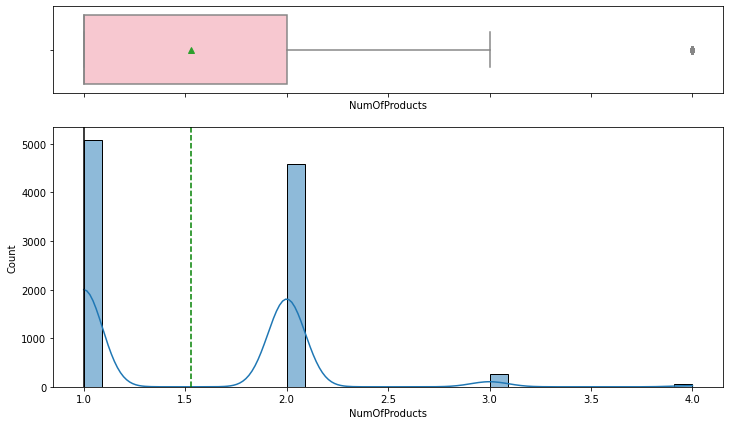

In [ ]:
histogram_boxplot(bank, 'NumOfProducts')

In [ ]:
bank['NumOfProducts'].skew()

0.7455678882823168

It is moderately positively skewed, so I will use log transformation.

In [ ]:
bank['NumOfProducts_log']=np.log(bank['NumOfProducts'])
bank['NumOfProducts_log'].skew()

0.23959503969037352

The log transformation reduced the skewness, and the distribution has become more normal. The skewness was reduced from 0.74 (moderately skewed) to 0.24 (very slightly skewed). Therefore, I will keep the log transformed feature and remove the original one from the dataset.

In [ ]:
bank.drop(['NumOfProducts'], axis=1, inplace=True)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Geography          10000 non-null  category
 2   Gender             10000 non-null  category
 3   Tenure             10000 non-null  int64   
 4   Balance            10000 non-null  float64 
 5   HasCrCard          10000 non-null  category
 6   IsActiveMember     10000 non-null  category
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  int64   
 9   Age_log            10000 non-null  float64 
 10  NumOfProducts_log  10000 non-null  float64 
dtypes: category(4), float64(4), int64(3)
memory usage: 586.6 KB


###Estimated Salary###

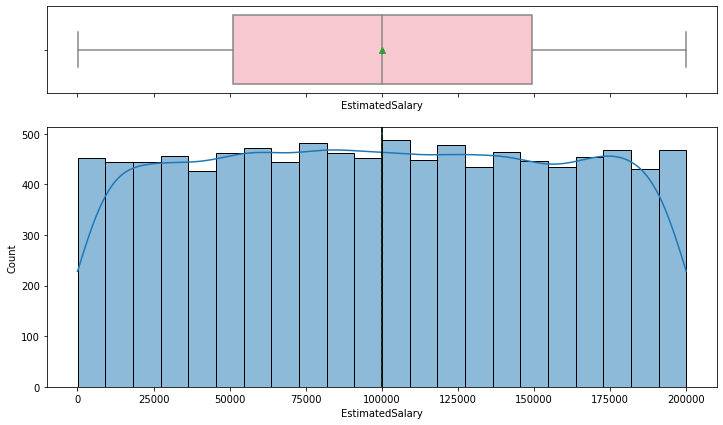

In [ ]:
histogram_boxplot(bank, 'EstimatedSalary')

In [ ]:
bank['EstimatedSalary'].skew()

0.0020853576615585162

It is almost completely normal distribution, so there is no need for any kind of transformation or outlier treatment.

###Geography###

In [ ]:
# I will create a function that will plot labeled barplot for categorical variables

def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

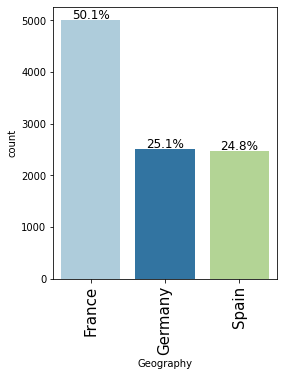

In [ ]:
labeled_barplot(bank, "Geography", perc=True)

Nearly half of the customers are from France, while Germany and Spain markets equally share the rest.

###Gender###

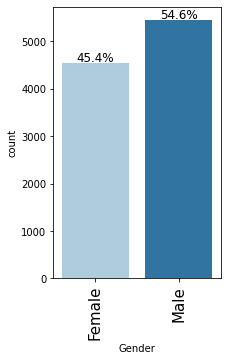

In [ ]:
labeled_barplot(bank, "Gender", perc=True)

The percentage of male customers is slightly higher than that of female customers, but there is not much difference in terms of gender.

###Has Credit Card?###

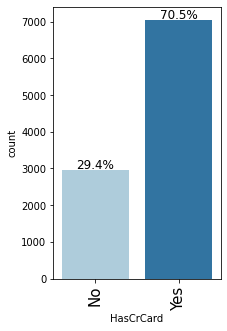

In [ ]:
labeled_barplot(bank, "HasCrCard", perc=True)

Nearly two-third of the customers have credit cards. 

###Is Active Member?###

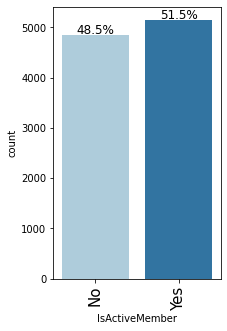

In [ ]:
labeled_barplot(bank, "IsActiveMember", perc=True)

Nearly half of the customers are not active members of the bank, meaning that they do not use bank products or make transactions regularly.

###Exited###

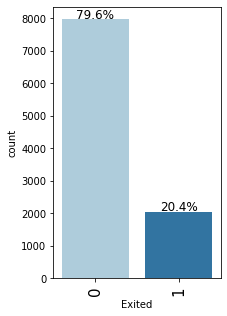

In [ ]:
labeled_barplot(bank, "Exited", perc=True)

20.4 percent of the customers left the bank within six months. Also, we see that there is a great imbalance between the two categories of our target variable, so some sampling techniques might be needed.

##Bivariate Analysis##

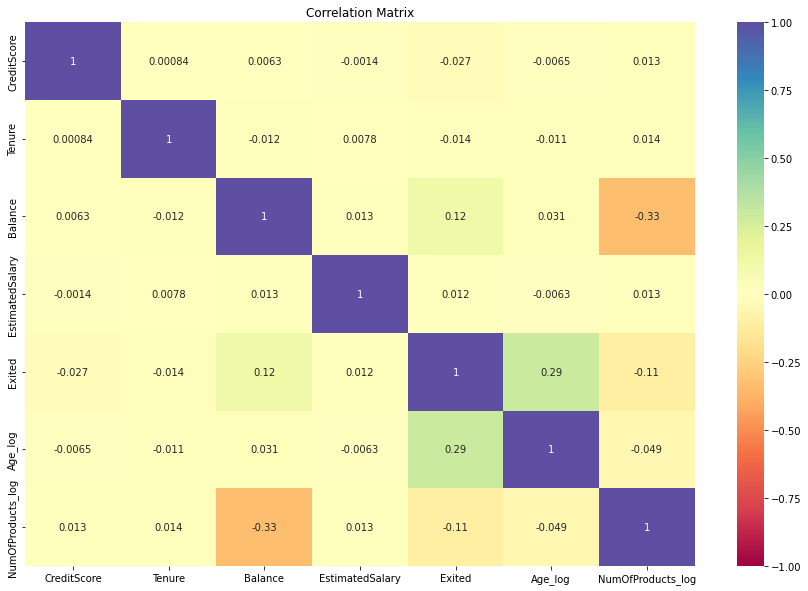

In [ ]:
# Correlation matrix and a heatmap 

plt.figure(figsize=(15,10))
sns.heatmap(bank.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

For the purposes of this analysis, I will explore the relationship of our outcome variable Exited with other variables, where the correlation coefficient is above .20. The only such variable is age_log, so I will explore their relationship.

###Exited vs. Age###

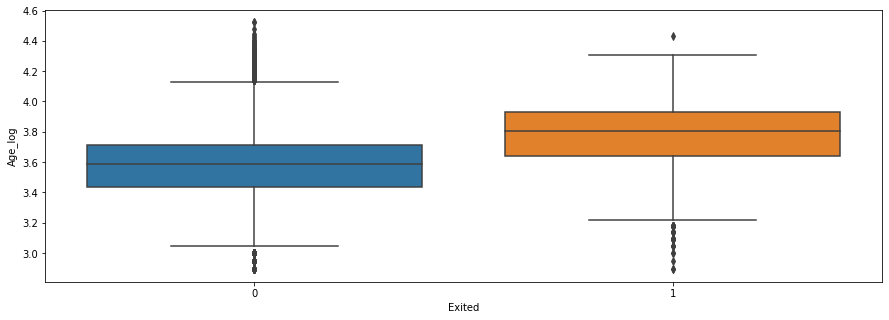

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Age_log',x='Exited',data=bank)
plt.show()

The customers who exited the bank within six months were significantly older than those who did not exit. The bank should further explore the reasons of why older customers tend to exit the bank. Could there be an age related factor that would cause their exit? Are they less satisfied from the bank's services? Does the bank's advertisement strategy focus too much on young people and not speak to older people? 

###Exited vs. Geography###

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Geography          10000 non-null  category
 2   Gender             10000 non-null  category
 3   Tenure             10000 non-null  int64   
 4   Balance            10000 non-null  float64 
 5   HasCrCard          10000 non-null  category
 6   IsActiveMember     10000 non-null  category
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  int64   
 9   Age_log            10000 non-null  float64 
 10  NumOfProducts_log  10000 non-null  float64 
dtypes: category(4), float64(4), int64(3)
memory usage: 586.6 KB


In [ ]:
# The function below will create stacked barplot which will allow me to look at the relationship of Attrition with other categorical variables 


def stacked_barplot(data, predictor, target):
  
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


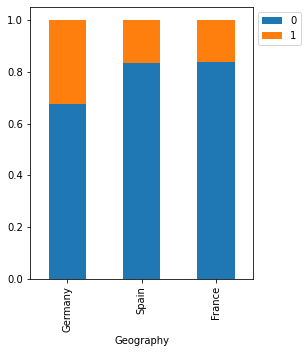

In [ ]:
stacked_barplot(bank, "Geography", "Exited" )

The number of people who exited the bank was higher in Germany than in Spain or France. It might indicate an issue specific to Germany and the bank's strategy or offices in that country.

###Exited vs. Gender###

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


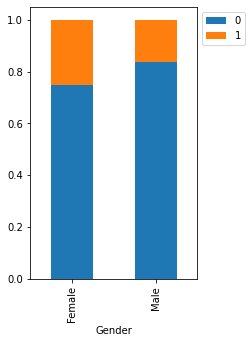

In [ ]:
stacked_barplot(bank, "Gender", "Exited" )

The number of female customers who exited was higher than that of male customers. Is it coincidence or is there a specific reason for that? 

###Exited vs. Has Credit Card###

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
Yes        5631  1424   7055
No         2332   613   2945
------------------------------------------------------------------------------------------------------------------------


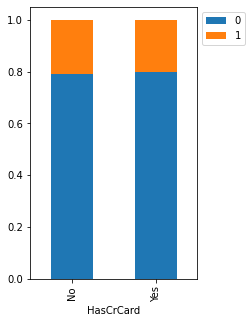

In [ ]:
stacked_barplot(bank, "HasCrCard", "Exited" )

It seems whether a person has a credit card or not does not impact the person's decision of exiting.

###Exited vs. Is Active Member###

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
No              3547  1302   4849
Yes             4416   735   5151
------------------------------------------------------------------------------------------------------------------------


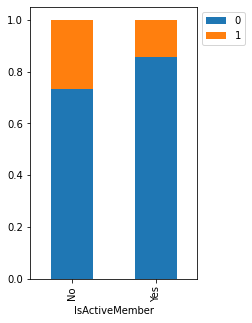

In [ ]:
stacked_barplot(bank, "IsActiveMember", "Exited" )

It seems that less active members of the bank has more chance to exit the bank compared to more active members. That is is an expected outcome, but the bank may want to reveal the reasons why some people are actively using, while some others are not. Is it due to some bank-related factors? Maybe it is connected with the fact that older people exit the bank more. Let's look at the relationship between age and member activeness.

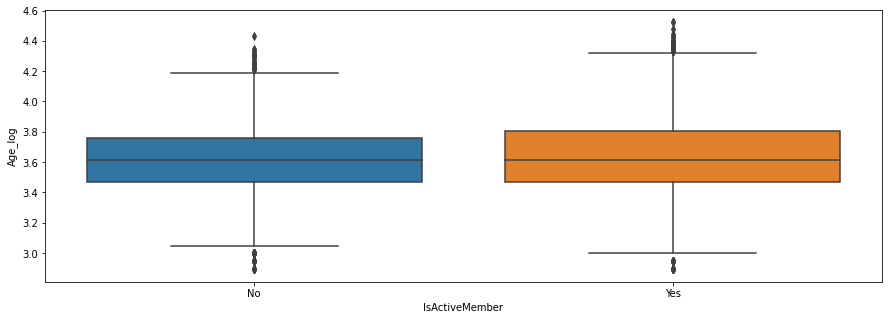

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Age_log',x='IsActiveMember',data=bank)
plt.show()

There is no age difference in terms of member activeness, although both age and member activeness differ in the context of chance to exit the bank. That is an interesting result which says us that there is no interaction between age and member activeness when it comes to one's probability of exiting the bank, but each has separate impact on or impacted by that probability. 

#Data Preprocessing#

##Splitting the Data##

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Geography          10000 non-null  category
 2   Gender             10000 non-null  category
 3   Tenure             10000 non-null  int64   
 4   Balance            10000 non-null  float64 
 5   HasCrCard          10000 non-null  category
 6   IsActiveMember     10000 non-null  category
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  int64   
 9   Age_log            10000 non-null  float64 
 10  NumOfProducts_log  10000 non-null  float64 
dtypes: category(4), float64(4), int64(3)
memory usage: 586.6 KB


In [ ]:
# I will store categorical variables for encoding
cat_bank = ['Geography','Gender','HasCrCard', 'IsActiveMember']


In [ ]:
# I will assign independent and dependent variables in X and Y respectively
X = bank.drop(['Exited'],axis=1)
y = bank[['Exited']]

print(X.shape)
print(y.shape)

(10000, 10)
(10000, 1)


In [ ]:
#I will split the dataset into train, validation, and test sets.

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# The code below will create train and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp)

In [ ]:
# Let's check the shape of each set

print(X_train.shape, X_val.shape, X_test.shape)

print(y_train.shape, y_val.shape, y_test.shape)

(6400, 10) (1600, 10) (2000, 10)
(6400, 1) (1600, 1) (2000, 1)


##Scaling the Data##

In [ ]:
sc=StandardScaler()
temp = sc.fit(X_train[['CreditScore','Tenure','Balance','EstimatedSalary','Age_log','NumOfProducts_log']])
X_train[['CreditScore','Tenure','Balance','EstimatedSalary','Age_log','NumOfProducts_log']] = temp.transform(X_train[['CreditScore','Tenure','Balance','EstimatedSalary','Age_log','NumOfProducts_log']])
X_test[['CreditScore','Tenure','Balance','EstimatedSalary','Age_log','NumOfProducts_log']] = temp.transform(X_test[['CreditScore','Tenure','Balance','EstimatedSalary','Age_log','NumOfProducts_log']])
X_val[['CreditScore','Tenure','Balance','EstimatedSalary','Age_log','NumOfProducts_log']] = temp.transform(X_val[['CreditScore','Tenure','Balance','EstimatedSalary','Age_log','NumOfProducts_log']])


Because it is a classification problem (whether a person will exit or not within 6 months), we will not scale the target variable. Scaling is done for only continuous variables.

##One Hot Encoding##

In [ ]:
X_train = pd.get_dummies(X_train,columns=cat_bank,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_bank,drop_first= True)
X_val = pd.get_dummies(X_val,columns=cat_bank,drop_first= True)  

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6400, 11)
(1600, 11)
(6400, 1)
(1600, 1)
(2000, 11)
(2000, 1)


In [ ]:
X_train.head()

,CreditScore,Tenure,Balance,EstimatedSalary,Age_log,NumOfProducts_log,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
5292,0.976155,0.347046,-1.212523,0.939366,-1.147573,0.901492,0,0,0,1,0
3879,1.316949,1.377238,1.214872,1.389376,-0.514177,0.901492,0,0,0,0,0
6118,-0.190810,0.003649,1.473810,0.692477,1.009771,-0.962075,0,0,0,0,0
4044,0.077695,1.033841,-1.212523,-0.347954,-0.632803,-0.962075,0,0,1,1,1
3202,-0.893054,-0.339749,0.961751,-0.647963,-0.514177,-0.962075,0,0,0,1,0


As we see, all numerical independent variables have been standardized, and all categorical independent variables have been dummified. 

#Model Building#

##Model Evaluation Criterion##

The potential wrong predictions are the following:



1.   The model predicts that a customer will exit the bank within 6 months, while in fact, he or she will not exit: False Positive
2.   The model predicts that a customer will not exit the bank within 6 months, while in fact, he or she will exit: False Negative

The first prediction results in a loss of resources (e.g., services, offers, promotions) developed with the purpose that the customer will not exit within 6 months. On the other hand, the second prediction results in loss of opportunity (i.e., the customer), which is against the main purpose of the bank, that is improving its services to keep the customer. 

Therefore, Recall score in model building should be maximized to reduce the rate of false negative. 

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
  
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        
        accuracy  = np.trace(cf) / float(np.sum(cf))
        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

##Model 1##

In [ ]:
backend.clear_session()
# I will use seed function to create random number generators, so we can receive the same output in every analysis
np.random.seed(42)
import random
random.seed(42)
tensorflow.random.set_seed(42)

In [ ]:
# Initializing the model
model = Sequential()
# Adding input layer with 256 neurons, relu as activation function and, he_normal as weight initializer.
model.add(Dense(256, activation='relu', kernel_initializer='he_normal', input_shape=(11,)))
# Adding the first hidden layer with 128 neurons, others are same
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
# Adding the second hidden layer with 64 neurons, other are same
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
# Adding the output layer with one neuron and sigmoid as activation function
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 44,289
Trainable params: 44,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = optimizers.Adam(learning_rate=1e-3)

In [ ]:
model.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128)

Epoch 1/50
50/50 [==============================] - 1s 8ms/step - loss: 0.5434 - accuracy: 0.7595 - val_loss: 0.4157 - val_accuracy: 0.8225
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.8366 - val_loss: 0.3832 - val_accuracy: 0.8331
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.8498 - val_loss: 0.3664 - val_accuracy: 0.8475
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3476 - accuracy: 0.8544 - val_loss: 0.3695 - val_accuracy: 0.8425
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8587 - val_loss: 0.3649 - val_accuracy: 0.8450
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3298 - accuracy: 0.8647 - val_loss: 0.3681 - val_accuracy: 0.8419
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.3248 - accuracy: 0.8648 - val_loss: 0.3659 - val_accuracy: 0.8394
Epoch 8/50
50/50 [==

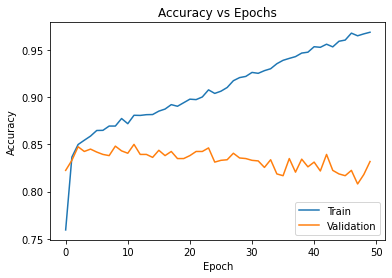

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Whereas training accuracy got better in each consecutive epoch, validation accuracy stayed similar, so the difference between training accuracy and validation accuracy increased epoch by epoch. Therefore, although training accuracy gets above 95%, validation accuracy stays around 80-85. It indicates an overfitting problem in my neural network model. I need to solve that issue by tweaking some hyperparameters and reducing the number of layers or nodes.

In [ ]:
model.evaluate(X_test, y_test, verbose = 1)
test_pred1 = np.round(model.predict(X_test))

63/63 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1593
           1       0.62      0.44      0.52       407

    accuracy                           0.83      2000
   macro avg       0.75      0.69      0.71      2000
weighted avg       0.82      0.83      0.82      2000



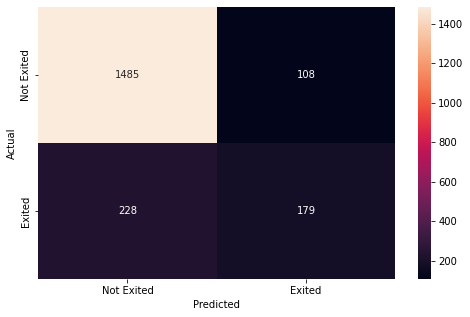

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred1))
cm = confusion_matrix(y_test, test_pred1)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Model 2##

In [ ]:
# I will clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Using random seed again

np.random.seed(42)

import random
random.seed(42)

tensorflow.random.set_seed(42)

In [ ]:
# Initializing the model
model2 = Sequential()
model2.add(Dense(128, activation='tanh', kernel_initializer='he_normal', input_shape=(11,)))
model2.add(Dense(64, activation='tanh',kernel_initializer='he_normal'))
model2.add(Dense(32, activation='tanh',kernel_initializer='he_normal'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
adam = optimizers.Adam(learning_rate=1e-3)
model2.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128)

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 0.4447 - accuracy: 0.8019 - val_loss: 0.3997 - val_accuracy: 0.8275
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8359 - val_loss: 0.3795 - val_accuracy: 0.8369
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8491 - val_loss: 0.3652 - val_accuracy: 0.8413
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8522 - val_loss: 0.3661 - val_accuracy: 0.8388
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.8586 - val_loss: 0.3602 - val_accuracy: 0.8450
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.8605 - val_loss: 0.3625 - val_accuracy: 0.8500
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8645 - val_loss: 0.3538 - val_accuracy: 0.8531
Epoch 8/50
50/50 [==

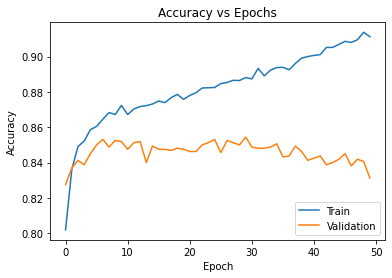

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Reducing the number of nodes slightly decreased the difference between training accuracy and validation accuracy, but there is still an obvious overfitting problem. I will use dropout layer and batch normalization between hidden layers and see if that solves the problem.




In [ ]:
model2.evaluate(X_test, y_test, verbose = 1)
test_pred2 = np.round(model2.predict(X_test))

63/63 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1593
           1       0.65      0.49      0.56       407

    accuracy                           0.84      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000



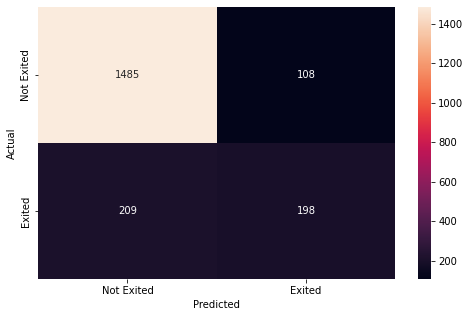

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred2))
cm = confusion_matrix(y_test, test_pred2)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Model 3##

In [ ]:
# I will clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Using random seed again

np.random.seed(42)

import random
random.seed(42)

tensorflow.random.set_seed(42)

In [ ]:
# Initializing the model
model3 = Sequential()
model3.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(11,)))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu',kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
adam = optimizers.Adam(learning_rate=1e-3)
model3.compile(loss=losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.6715 - accuracy: 0.6525 - val_loss: 0.4838 - val_accuracy: 0.8037
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.7627 - val_loss: 0.4387 - val_accuracy: 0.8050
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7861 - val_loss: 0.4389 - val_accuracy: 0.8037
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.8016 - val_loss: 0.4326 - val_accuracy: 0.8062
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.8030 - val_loss: 0.4305 - val_accuracy: 0.8031
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8119 - val_loss: 0.4171 - val_accuracy: 0.8125
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.8106 - val_loss: 0.4241 - val_accuracy: 0.8075

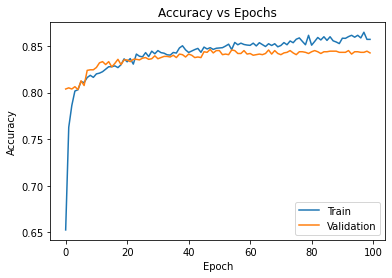

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Adding dropout layers and using batch normalization greatly reduced the difference between training accuracy and validation accuracy. On the other hand, it reduced the overall training accuracy as well from around 95 to around 85. I will explore further and see if I can increase both validation accuracy and training accuracy without increasing the difference between them.

In [ ]:
model3.evaluate(X_test, y_test, verbose = 1)
test_pred3 = np.round(model3.predict(X_test))

63/63 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.84      0.37      0.51       407

    accuracy                           0.86      2000
   macro avg       0.85      0.68      0.71      2000
weighted avg       0.85      0.86      0.83      2000



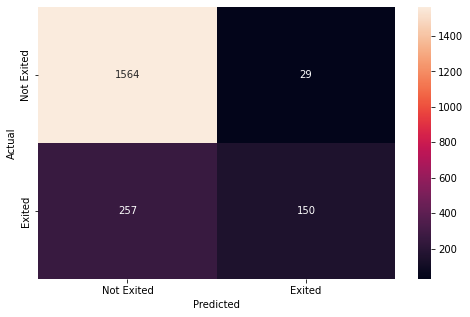

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred3))
cm = confusion_matrix(y_test, test_pred3)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Model 4##

In [ ]:
# I will clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Using random seed again

np.random.seed(42)

import random
random.seed(42)

tensorflow.random.set_seed(42)

In [ ]:
# Initializing the model
model4 = Sequential()
model4.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(11,)))
model4.add(Dropout(0.6))
model4.add(Dense(32, activation='relu',kernel_initializer='he_normal'))
model4.add(Dropout(0.6))
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
rms = optimizers.RMSprop(learning_rate=1e-3)
model4.compile(loss=losses.binary_crossentropy, optimizer=rms, metrics=['accuracy'])

In [ ]:
history = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.7651 - accuracy: 0.6997 - val_loss: 0.4764 - val_accuracy: 0.7969
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5879 - accuracy: 0.7548 - val_loss: 0.4706 - val_accuracy: 0.7969
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.7775 - val_loss: 0.4644 - val_accuracy: 0.7969
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7898 - val_loss: 0.4551 - val_accuracy: 0.7962
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7952 - val_loss: 0.4509 - val_accuracy: 0.7962
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7994 - val_loss: 0.4468 - val_accuracy: 0.7981
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7981 - val_loss: 0.4428 - val_accuracy: 0.7981

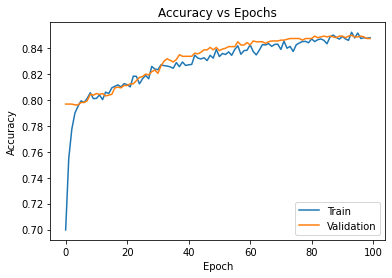

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

We could not increase validation accuracy in any of the four models, which can result from sample imbalance between the two categories of target variable, and that imbalance becomes even more significant in validation set which is smaller in size compared to training data.

On the other hand, the difference between training accuracy and validation accuracy became almost zero, meaning that overfitting problem has been solved. Among the four models, this seems the best one in terms of performance, so we will check the performance on test data.

##Model evaluation on test data##

In [ ]:
model4.evaluate(X_test, y_test, verbose = 1)
test_pred4 = np.round(model4.predict(X_test))

63/63 [==============================] - 0s 1ms/step


The test accuracy is revealed to be 85.95% which is very close to our training accuracy and validation accuracy. It implies that our model is able to replicate the performance from the train and validation data on real world (test set).

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.80      0.39      0.53       407

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



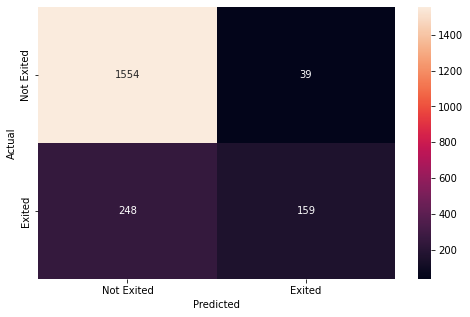

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred4))
cm = confusion_matrix(y_test, test_pred4)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

63/63 [==============================] - 0s 983us/step


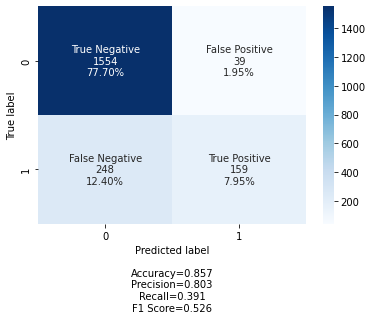

In [ ]:
import seaborn as sn
y_pred1 = model4.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

**Overall Comment:** Although we succeeded in solving the overfitting problem, none of the models provided a good recall score in class 1. That can be due to high imbalance between the sample size of different categories of training set as well as validation set.

#Business Insights and Recommendations#



*  There is a correlation between customer age and exiting behavior. Higher the customer age, higher the probability of exiting is. Therefore, the bank should discuss the potential reasons of why older customers have more chance to exit the bank. Could there be an age related factor that would cause their exit? Maybe, new services that require new technologies are not introduced in a way that older people who experience more difficulty with new technologies would easily understand and adapt, which can lead them to be less satisfied with the bank's new services? Or maybe, the bank's advertisement strategy focus too much on young people and not speak to older people. As I said, the managers of the bank should think about the reasons that lead older people to exit the bank. 

*   We found that less active members of the bank has more chance to exit the bank compared to more active members. Therefore, the bank should find ways to make their members more active. Activity refers to using services or making transactions. More options like cash back, promotions, or discounts from popular companies would encourage customers to make more transaction and use services more frequently. 

*   We found that there might be some issues with the bank's branches in Germany, because the numbers of customers who exited the bank was significantly higher in Germany than that in Spain or France. The bank should further explore what is going on in Germany.



